Gráfico (Gráfica de pendiente) propuesto por Edward Tufte que muestra cómo cambian varias entidades entre **dos puntos de comparación** (por ejemplo, dos años, dos categorías o dos valores). Cada entidad se representa con una línea que conecta su valor inicial y su valor final.

## Cuándo utilizar un slopegraph

1. **Comparaciones “antes y después”**  

2. **Cambios en el ranking o jerarquía**  

3. **Magnitud relativa del cambio**  

4. **Posicionamiento relativo entre dos variables**  

5. **Variaciones con múltiples dimensiones**  

6. **Identificación de desviaciones en la tendencia**  


## Errores comunes

1. **Comparaciones sin relación lógica**  
   No es adecuado cuando los dos puntos comparados no tienen un vínculo significativo, ya que se pueden generar correlaciones engañosas.

2. **Ausencia de tendencia clara**  
   Si los valores no muestran un patrón evidente, el gráfico se llena de líneas cruzadas y pierde legibilidad.

3. **Cuando la serie completa es relevante**  
   Si lo importante son las fluctuaciones intermedias, conviene usar gráficos de líneas o de áreas en lugar de un slopegraph.


## Ventajas

- **Claridad y minimalismo**: elimina elementos innecesarios y se centra en la comparación esencial.  
- **Flexibilidad en el eje Y**: no requiere iniciar en cero, lo que facilita hacer “zoom” en los datos.  
- **Fácil interpretación**: incluso por públicos sin formación en visualización de datos.  
- **Limitar el número de entidades** para evitar un gráfico saturado.  
- Resaltar solo las entidades clave y dejar las demás en gris.  
- Utilizar paletas divergentes (verde para aumentos, rojo para descensos).  
- Agrupar categorías mediante un color común.  
- **Etiquetas claras en ambos extremos**: incluir tanto el nombre como el valor en los dos lados del gráfico, asegurando buena legibilidad.


# Dataset: Precios Agroindustria de Cacao (2012 - 2025)

**Archivo:** `MAG_PreciosAgroindustriaCacao_2025Junio.csv`  
**Fuente:** Ministerio de Agricultura y Ganadería (MAG), Ecuador  
**Última actualización:** Junio 2025  

In [463]:
import pandas as pd
df = pd.read_csv("mag_preciosagroindustriacacao_2025junio.csv", sep=";")
print(df.head())
print(df.info())

   PACC_ANIO PACC_MES DPA_PROVINCIA DPA_CANTON        PACC_PRODUCTO  \
0       2012    Enero        El Oro  Arenillas  Cacao seco mezclado   
1       2012    Enero        El Oro  Arenillas  Cacao seco mezclado   
2       2012    Enero        El Oro   El Guabo  Cacao seco mezclado   
3       2012    Enero        El Oro   El Guabo  Cacao seco mezclado   
4       2012    Enero        El Oro    Machala  Cacao seco mezclado   

          PACC_PRESENTACION PACC_TIPO  PACC_PRECIO_USD  PACC_USD_KG  
0  Quintal de 100,00 libras    Compra            71.41         1.57  
1  Quintal de 100,00 libras     Venta            74.06         1.63  
2  Quintal de 100,00 libras    Compra            73.75         1.63  
3  Quintal de 100,00 libras     Venta            84.00         1.85  
4  Quintal de 100,00 libras    Compra            75.00         1.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26246 entries, 0 to 26245
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype

In [464]:

import altair as alt

df = df[df['PACC_ANIO'].isin([2015, 2025])].dropna(subset=['PACC_PRECIO_USD'])

df_group = (
    df.groupby(["PACC_ANIO", "DPA_PROVINCIA"], as_index=False)["PACC_PRECIO_USD"]
    .mean()
    .round(2)
)


df_wide = df_group.pivot(
    index="DPA_PROVINCIA",
    columns="PACC_ANIO",
    values="PACC_PRECIO_USD"
).reset_index()


# Cambio de formato para mejor visualizacion
df_long = df_wide.melt(
    id_vars="DPA_PROVINCIA",
    value_vars=[2015, 2025],
    var_name="Año",
    value_name="Precio"
)

# graficar
chart = (
    alt.Chart(df_long)
    .mark_line(point=True)
    .encode(
        x=alt.X("Año:N", title="Año", axis=alt.Axis(labelAngle=0, grid=False)),
        y=alt.Y("Precio:Q", axis=None),  # eliminamos el eje Y
        color=alt.Color("DPA_PROVINCIA:N", title="Provincia"),
        detail="DPA_PROVINCIA:N",
        tooltip=["Año", "DPA_PROVINCIA", "Precio"]
    )
    .properties(width=600, height=400)
)

chart


c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.


alt.Chart(...)

In [465]:
import altair as alt

# --- Filtrar y agrupar ---
df = df[df['PACC_ANIO'].isin([2015, 2025])].dropna(subset=['PACC_PRECIO_USD'])

df_group = (
    df.groupby(["PACC_ANIO", "DPA_PROVINCIA"], as_index=False)["PACC_PRECIO_USD"]
    .mean()
    .round(2)
)

df_wide = df_group.pivot(
    index="DPA_PROVINCIA",
    columns="PACC_ANIO",
    values="PACC_PRECIO_USD"
).reset_index()

# Formato largo
df_long = df_wide.melt(
    id_vars="DPA_PROVINCIA",
    value_vars=[2015, 2025],
    var_name="Año",
    value_name="Precio"
)

# --- Gráfico principal ---
base = alt.Chart(df_long).encode(
    x=alt.X("Año:N", title="Año", axis=alt.Axis(labelAngle=0, grid=False)),
    y=alt.Y("Precio:Q", axis=None),
    color=alt.Color("DPA_PROVINCIA:N", legend=None),  # sin leyenda
    detail="DPA_PROVINCIA:N",
    tooltip=["Año", "DPA_PROVINCIA", "Precio"]
)

# Líneas + puntos
lines = base.mark_line(point=True)

# Etiquetas con nombre de provincia
labels = base.mark_text(
    align="left", dx=5, dy=-5, size=10
).encode(
    text="DPA_PROVINCIA"
)

# Combinar
chart = (lines + labels).properties(width=600, height=400)

chart


c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.


alt.LayerChart(...)

In [466]:
import altair as alt

# --- Filtrar y agrupar ---
df = df[df['PACC_ANIO'].isin([2015, 2025])].dropna(subset=['PACC_PRECIO_USD','PACC_ANIO'])


df_group = (
    df.groupby(["PACC_ANIO", "DPA_PROVINCIA"], as_index=False)["PACC_PRECIO_USD"]
    .mean()
    .round(2)
)


df_wide = df_group.pivot(
    index="DPA_PROVINCIA",
    columns="PACC_ANIO",
    values="PACC_PRECIO_USD"
).reset_index()

# Formato largo
df_long = df_wide.melt(
    id_vars="DPA_PROVINCIA",
    value_vars=[2015, 2025],
    var_name="Año",
    value_name="Precio"
)

# --- Gráfico base (con propiedades de tamaño) ---
base = alt.Chart(df_long).mark_line(point=True).encode(
    x=alt.X("Año:N", title="Año", axis=alt.Axis(labelAngle=0, grid=False)),
    y=alt.Y("Precio:Q", title="Precio promedio (USD)"),
    color=alt.Color("DPA_PROVINCIA:N", legend=None),
    detail="DPA_PROVINCIA:N",
    tooltip=["Año", "DPA_PROVINCIA", "Precio"]
).properties(
    width=200,
    height=150
)

# --- Facet: cada provincia un slopegraph ---
chart = base.facet(
    facet="DPA_PROVINCIA:N",
    columns=3
)

chart


c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.


alt.FacetChart(...)

# Utilizacion de Plotnine

**Plotnine** es un paquete de visualización de datos en Python basado en la *gramática de gráficos*, un sistema coherente para describir y construir gráficos. Su sintaxis es similar a **ggplot2** de R, lo que facilita crear visualizaciones complejas y reproducibles. Con un flujo de trabajo típico, permite explorar y comunicar datos, como se ejemplifica en *Anscombe’s Quartet*, destacando la importancia de visualizar más allá de las estadísticas descriptivas.  

 [plotnine.org](https://plotnine.org/)


In [467]:
#Instalacion
#pip install plotnine

In [468]:
import pandas as pd
import altair as alt

# --- 1. Filtrar años y eliminar nulos ---
df = df[df['PACC_ANIO'].isin([2015, 2025])].dropna(subset=['PACC_PRECIO_USD'])

# --- 2. Agrupación y media ---
df_group = (
    df.groupby(["PACC_ANIO", "DPA_PROVINCIA"], as_index=False)["PACC_PRECIO_USD"]
    .mean()
    .round(2)
)

# --- 3. Pivotear a formato ancho ---
df_wide = df_group.pivot(
    index="DPA_PROVINCIA",
    columns="PACC_ANIO",
    values="PACC_PRECIO_USD"
).reset_index()

df_wide.columns.name = None  # quitar nombre del índice de columnas

# --- 4. Convertir a formato largo para Altair ---
df_long = df_wide.melt(
    id_vars="DPA_PROVINCIA",
    value_vars=[2015, 2025],
    var_name="Año",
    value_name="Precio"
)

# --- 5. Graficar slopegraph clásico ---
chart = (
    alt.Chart(df_long)
    .mark_line(point=True)
    .encode(
        x=alt.X("Año:N", title="Año", axis=alt.Axis(labelAngle=0, grid=False)),
        y=alt.Y("Precio:Q", axis=None),  # eliminamos el eje Y
        color=alt.Color("DPA_PROVINCIA:N", title="Provincia"),
        detail="DPA_PROVINCIA:N",
        tooltip=["Año", "DPA_PROVINCIA", "Precio"]
    )
    .properties(width=600, height=400)
)

chart


c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
c:\Users\meagu\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.


alt.Chart(...)

**Plotnine** es un paquete de visualización de datos en Python basado en la *gramática de gráficos*, un sistema coherente para describir y construir gráficos. Su sintaxis es similar a **ggplot2** de R, lo que facilita crear visualizaciones complejas y reproducibles. Con un flujo de trabajo típico, permite explorar y comunicar datos, como se ejemplifica en *Anscombe’s Quartet*, destacando la importancia de visualizar más allá de las estadísticas descriptivas.  
[plotnine.org](https://plotnine.org/)


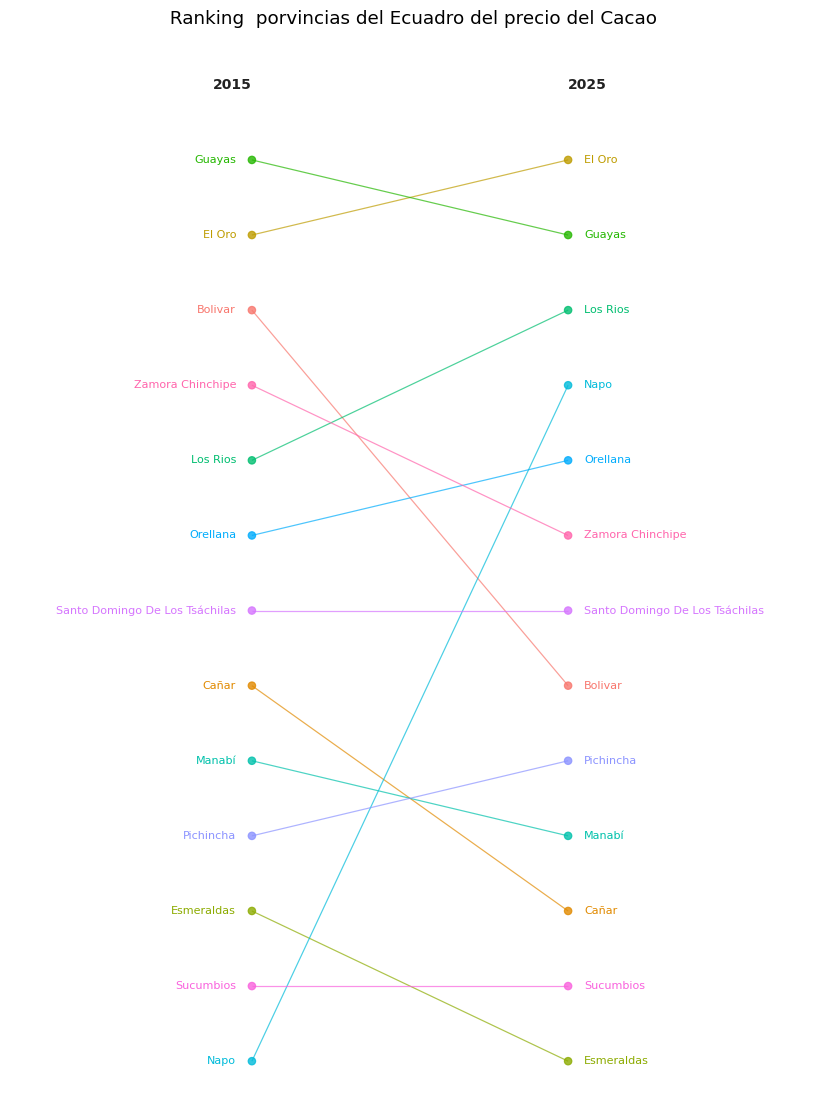

In [469]:
from plotnine import (
    ggplot, aes, geom_text, geom_point, geom_segment, annotate,
    lims, scale_y_reverse, theme_void, theme
)

# --- Filtrar y agrupar ---
df = df[df['PACC_ANIO'].isin([2015, 2025])].dropna(subset=['PACC_PRECIO_USD'])

df_group = (
    df.groupby(["PACC_ANIO", "DPA_PROVINCIA"], as_index=False)["PACC_PRECIO_USD"]
    .mean()
    .round(2)
)

# --- Eliminar provincias que no tienen ambos años ---
valid_provincias = (
    df_group.groupby("DPA_PROVINCIA")["PACC_ANIO"]
    .nunique()
    .reset_index()
)
valid_provincias = valid_provincias[valid_provincias["PACC_ANIO"] == 2]["DPA_PROVINCIA"]
df_group = df_group[df_group["DPA_PROVINCIA"].isin(valid_provincias)]

# --- Calcular ranking por año ---
df_group['Rank'] = df_group.groupby("PACC_ANIO")["PACC_PRECIO_USD"].rank(
    method="first", ascending=False
)

# --- Pivotear a formato wide ---
df_wide = df_group.pivot(
    index="DPA_PROVINCIA",
    columns="PACC_ANIO",
    values="Rank"
).reset_index()

# Renombrar columnas
df_wide = df_wide.rename(columns={2015: "rank2015", 2025: "rank2025"})

# Colores para etiquetas
black1 = "#252525"
black2 = "#222222"

# --- Gráfico slopegraph ---
plot = (
    ggplot(df_wide)
    # Etiquetas izquierda (2015)
    + geom_text(
        aes(x=1, y="rank2015", label="DPA_PROVINCIA", color="DPA_PROVINCIA"),
        nudge_x=-0.05,
        ha="right",
        size=8,
    )
    # Etiquetas derecha (2025)
    + geom_text(
        aes(x=2, y="rank2025", label="DPA_PROVINCIA", color="DPA_PROVINCIA"),
        nudge_x=0.05,
        ha="left",
        size=8,
    )
    # Puntos en 2015
    + geom_point(aes(x=1, y="rank2015", color="DPA_PROVINCIA"), size=2.5, alpha=0.8)
    # Puntos en 2025
    + geom_point(aes(x=2, y="rank2025", color="DPA_PROVINCIA"), size=2.5, alpha=0.8)
    # Segmentos que conectan
    + geom_segment(
        aes(x=1, y="rank2015", xend=2, yend="rank2025", color="DPA_PROVINCIA"),
        alpha=0.7
    )
    # Títulos de columnas
    + annotate(
        "text", x=1, y=0, label="2015",
        fontweight="bold", ha="right", size=10, color=black2
    )
    + annotate(
        "text", x=2, y=0, label="2025",
        fontweight="bold", ha="left", size=10, color=black2
    )
    # Margen horizontal
    + lims(x=(0.35, 2.65))
    # Invertir ranking (mejor arriba)
    + scale_y_reverse()
    # Quitar decoraciones
    + theme_void()
    # Ajustes finales
    + theme(figure_size=(8, 11), legend_position="none")
    + labs(title=" Ranking  porvincias del Ecuadro del precio del Cacao")
)

# Mostrar gráfico en notebook
plot.draw()
